<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 181.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 150.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 156.4 MB/s eta 0:00:00


##### Import Necessary Modules:


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [7]:
## Write your code here
print(df.describe(include='all'))
print(df.info())

          ResponseId                      MainBranch              Age  \
count   65437.000000                           65437            65437   
unique           NaN                               5                8   
top              NaN  I am a developer by profession  25-34 years old   
freq             NaN                           50207            23911   
mean    32719.000000                             NaN              NaN   
std     18890.179119                             NaN              NaN   
min         1.000000                             NaN              NaN   
25%     16360.000000                             NaN              NaN   
50%     32719.000000                             NaN              NaN   
75%     49078.000000                             NaN              NaN   
max     65437.000000                             NaN              NaN   

                 Employment                            RemoteWork   Check  \
count                 65437                   

### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [11]:
## Write your code here
df.replace("?", np.nan, inplace=True)
missing_data = df.isnull()
print(missing_data.head())

# Count missing values for each column
for column in missing_data.columns.values.tolist():
    print(missing_data[column].value_counts(), "/n")

   ResponseId  MainBranch    Age  Employment  RemoteWork  Check  \
0       False       False  False       False       False  False   
1       False       False  False       False       False  False   
2       False       False  False       False       False  False   
3       False       False  False       False        True  False   
4       False       False  False       False        True  False   

   CodingActivities  EdLevel  LearnCode  LearnCodeOnline  ...  JobSatPoints_6  \
0             False    False      False             True  ...            True   
1             False    False      False            False  ...           False   
2             False    False      False            False  ...            True   
3              True    False      False            False  ...            True   
4              True    False      False            False  ...            True   

   JobSatPoints_7  JobSatPoints_8  JobSatPoints_9  JobSatPoints_10  \
0            True            True       

##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



<Axes: >

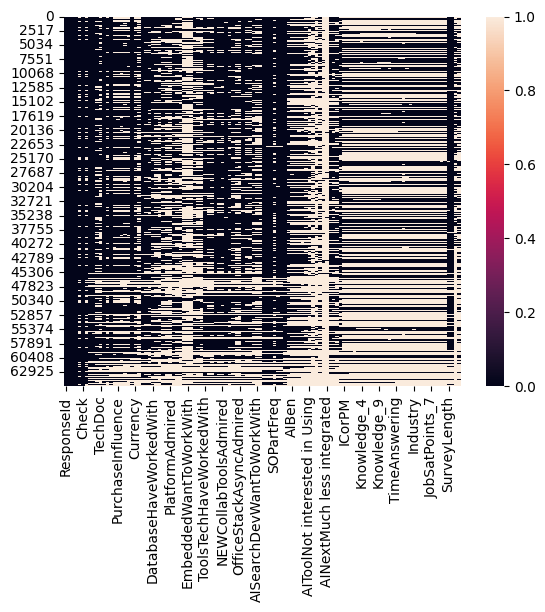

In [23]:
## Write your code here
sns.heatmap(missing_data)

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [24]:
## Write your code here
missing_Employment = df['Employment'].isnull()
print(missing_Employment.value_counts())
# No missing rows

Employment
False    65437
Name: count, dtype: int64


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [26]:
## Write your code here
common_value = df["Employment"].value_counts().idxmax()
print(common_value)

Employed, full-time


##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [27]:
## Write your code here
df["Employment"] = df["Employment"].replace(np.nan, common_value)
missing_EdLevel = df["Employment"].isnull()
print(missing_EdLevel.value_counts())

Employment
False    65437
Name: count, dtype: int64


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


count                   65437
unique                    110
top       Employed, full-time
freq                    39041
Name: Employment, dtype: object
<class 'pandas.core.series.Series'>
RangeIndex: 65437 entries, 0 to 65436
Series name: Employment
Non-Null Count  Dtype 
--------------  ----- 
65437 non-null  object
dtypes: object(1)
memory usage: 511.4+ KB
None


<Axes: xlabel='Employment'>

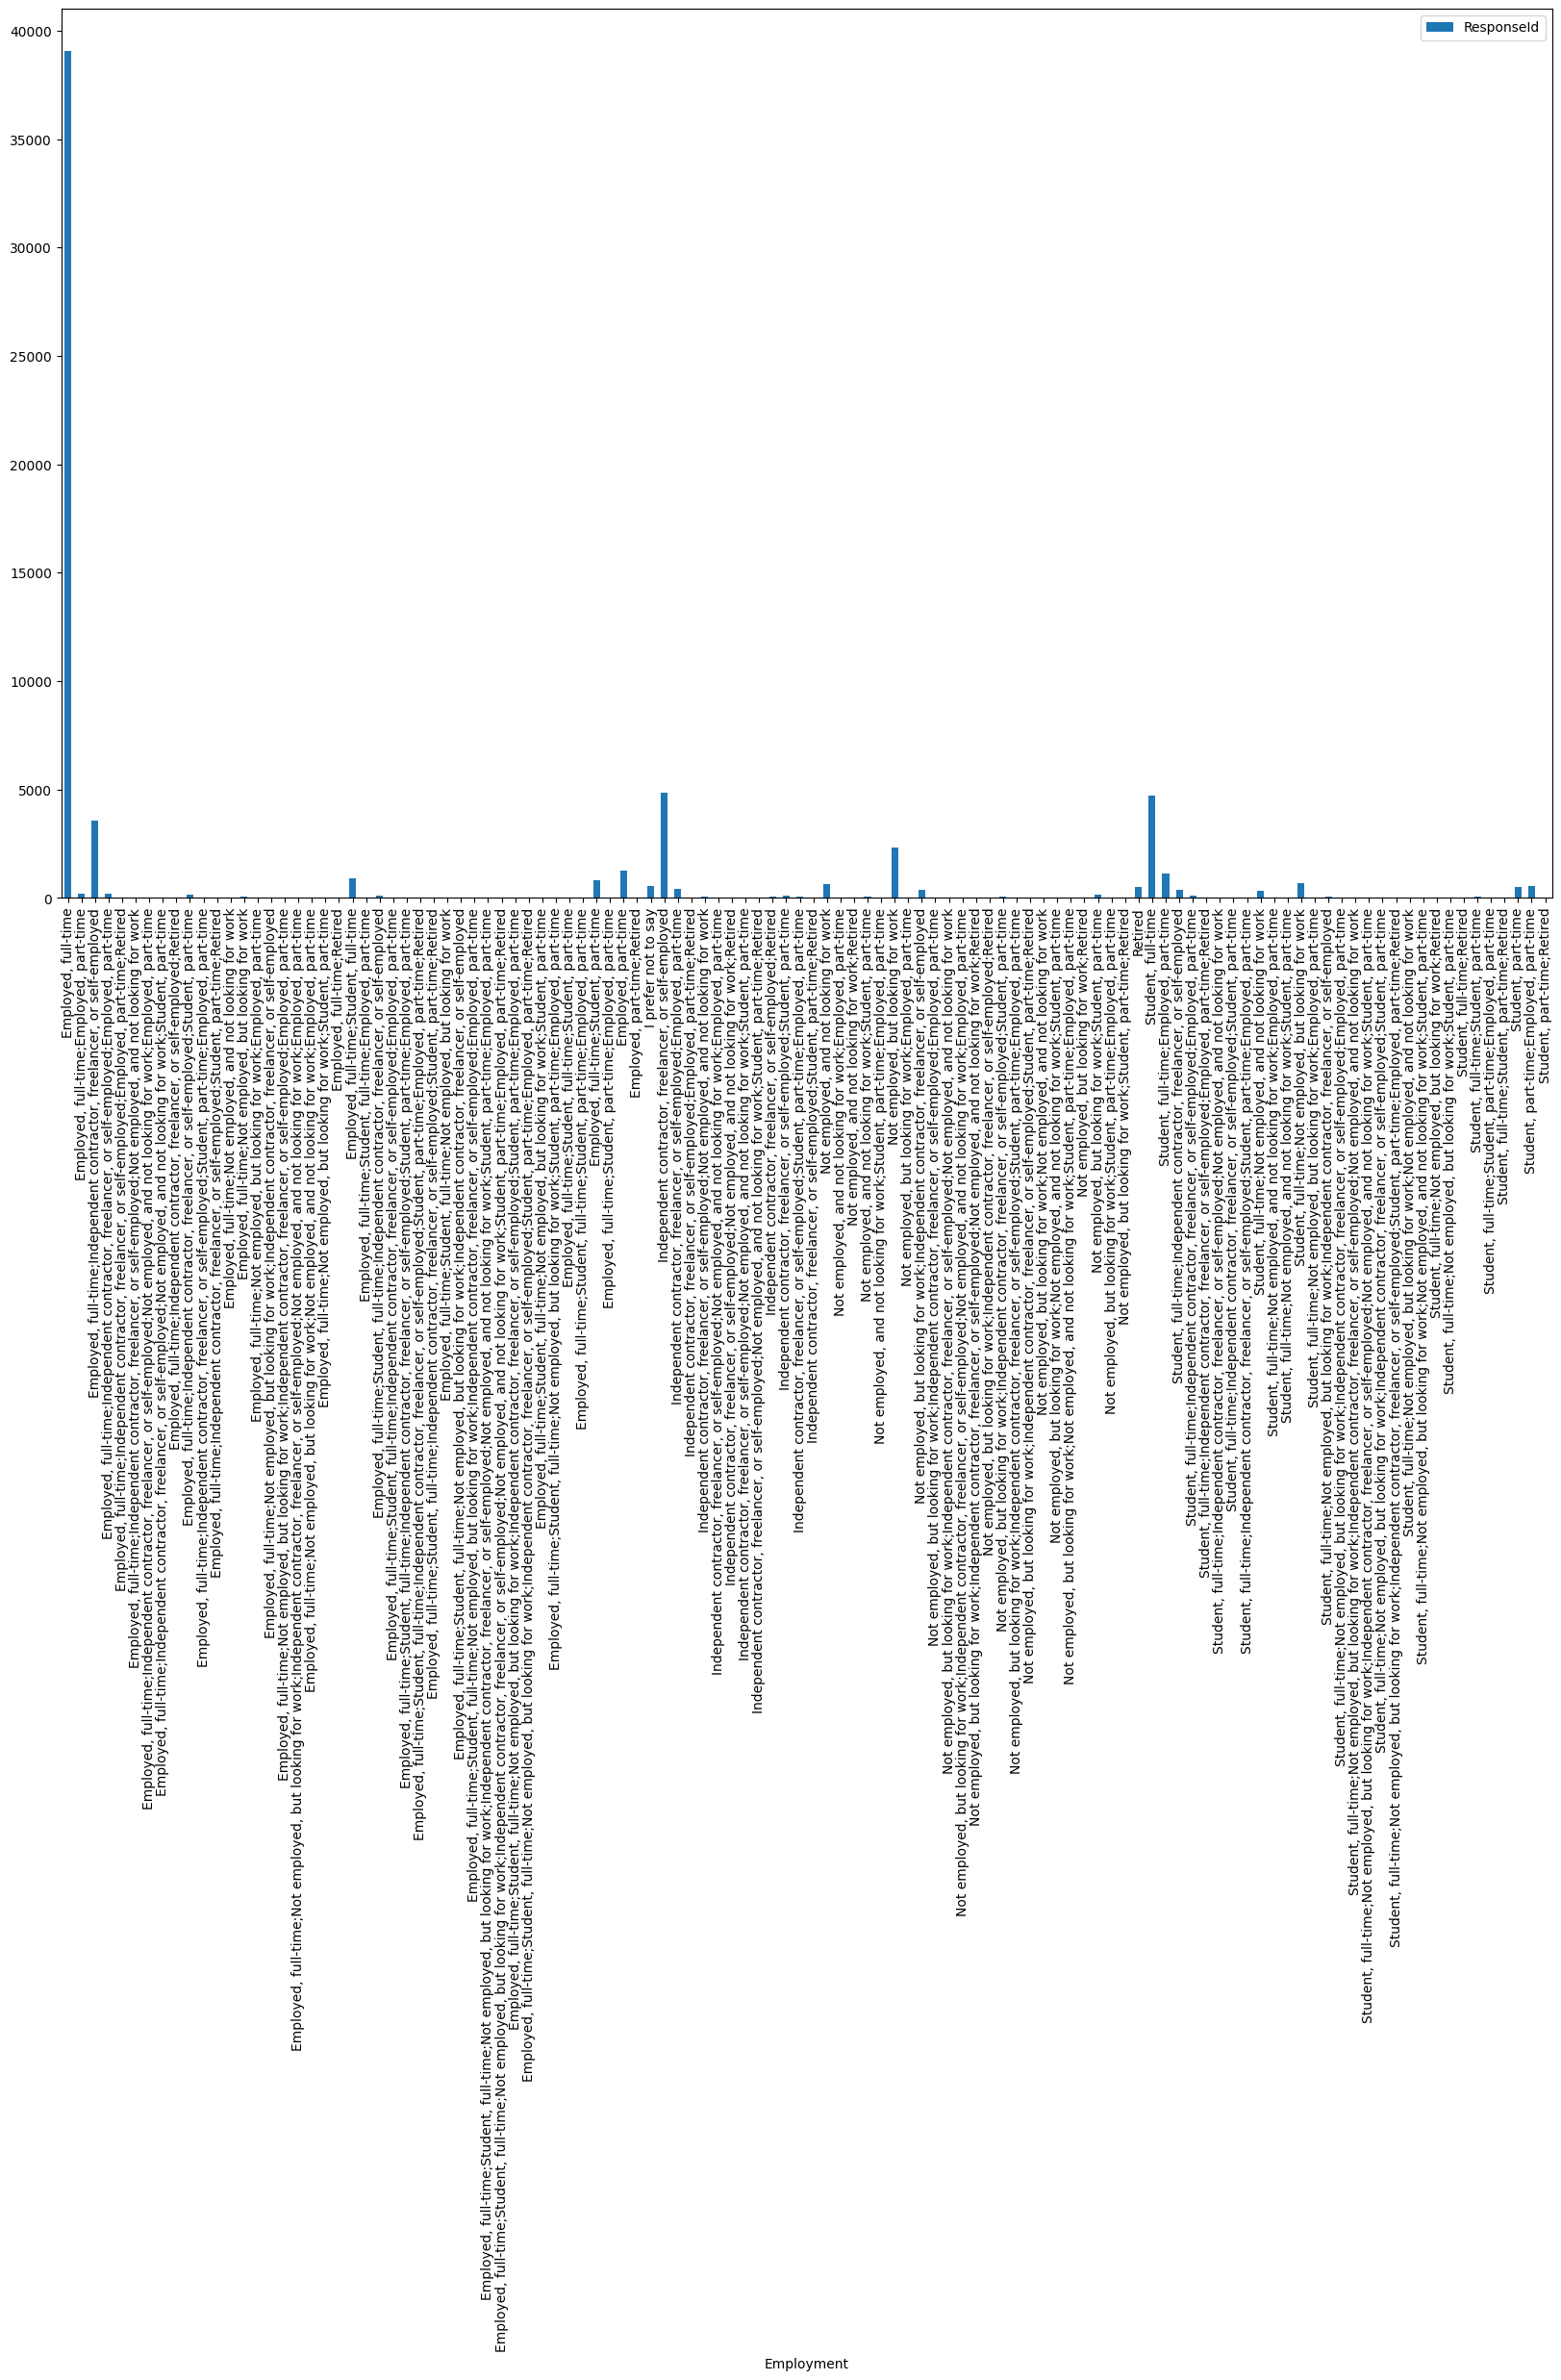

In [40]:
## Write your code here
print(df["Employment"].describe())
print(df["Employment"].info())

Employment_df = df[['ResponseId', 'Employment']].groupby('Employment').count()
Employment_df.plot(kind='bar', figsize=(20,12))

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
